# Лабораторная работа №6

## Ансамбли моделей машинного обучения.

Цель лабораторной работы: изучение ансамблей моделей машинного обучения.

In [4]:
import numpy as np
import pandas as pd
import seaborn as sns
import string
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.ensemble import GradientBoostingClassifier, GradientBoostingRegressor

from sklearn.metrics import accuracy_score, balanced_accuracy_score
from sklearn.metrics import precision_score, recall_score, f1_score, classification_report

## Выберите набор данных (датасет) для решения задачи классификации или регрессии.

Используем данные о баллах за экзамены.

In [5]:
# Будем использовать только обучающую выборку
data = pd.read_csv('datasets_74977_169835_StudentsPerformance.csv', sep=",")

In [6]:
# размер набора данных
data.shape

(1000, 8)

In [7]:
# типы колонок
data.dtypes

gender                         object
race/ethnicity                 object
parental level of education    object
lunch                          object
test preparation course        object
math score                      int64
reading score                   int64
writing score                   int64
dtype: object

In [8]:
# проверим есть ли пропущенные значения
data.isnull().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

In [9]:
data.isna().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

In [10]:
# Первые 5 строк датасета
data.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [11]:
total_count = data.shape[0]
print('Всего строк: {}'.format(total_count))

Всего строк: 1000


In [12]:
#cумма баллов будет более полезным столбцом
data['sum'] = data['math score'] + data['reading score'] + data['writing score']
#удалим избыточные столбцы

del data['race/ethnicity']

In [13]:
#заменим строковые значения целевого признака на числовые
data.loc[data['test preparation course'] == 'none', 'test preparation course'] = 0
data.loc[data['test preparation course'] == 'completed', 'test preparation course'] = 1

data.loc[data['gender'] == 'female', 'gender'] = 0
data.loc[data['gender'] == 'male', 'gender'] = 1

data.loc[data['lunch'] ==  'free/reduced', 'lunch'] = 0
data.loc[data['lunch'] == 'standard', 'lunch'] = 1

data.loc[data['parental level of education'] ==  'some high school', 'parental level of education'] = 0
data.loc[data['parental level of education'] == 'some college', 'parental level of education'] = 0
data.loc[data['parental level of education'] == 'high school', 'parental level of education'] = 0
data.loc[data['parental level of education'] == "bachelor's degree",'parental level of education'] = 1
data.loc[data['parental level of education'] == "master's degree",'parental level of education'] = 1
data.loc[data['parental level of education'] == "associate's degree",'parental level of education'] = 1

In [15]:
data.head()

,gender,parental level of education,lunch,test preparation course,math score,reading score,writing score,sum
0,0,1,1,0,72,72,74,218
1,0,0,1,1,69,90,88,247
2,0,1,1,0,90,95,93,278
3,1,1,0,0,47,57,44,148
4,1,0,1,0,76,78,75,229


In [18]:
def regr_to_class(y: int) -> int:
    if y>199:
        result = 1
    else:
        result = 0        
    return result 

In [19]:
data['res'] = data.apply(lambda row: regr_to_class(row['sum']),axis=1)

In [20]:
data['res'].unique()

array([1, 0])

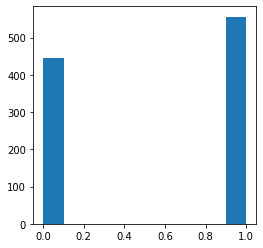

In [21]:
fig, ax = plt.subplots(figsize=(4,4)) 
plt.hist(data['res'])
plt.show()

In [22]:
data['res'].value_counts()

1    556
0    444
Name: res, dtype: int64

In [24]:
total = data.shape[0]
class_1, class_0 = data['res'].value_counts()
print('Класс 0: {}%, а класс 1: {}%.'
      .format(round(class_0 / total, 2)*100, round(class_1 / total, 2)*100))

Класс 0: 44.0%, а класс 1: 56.00000000000001%.


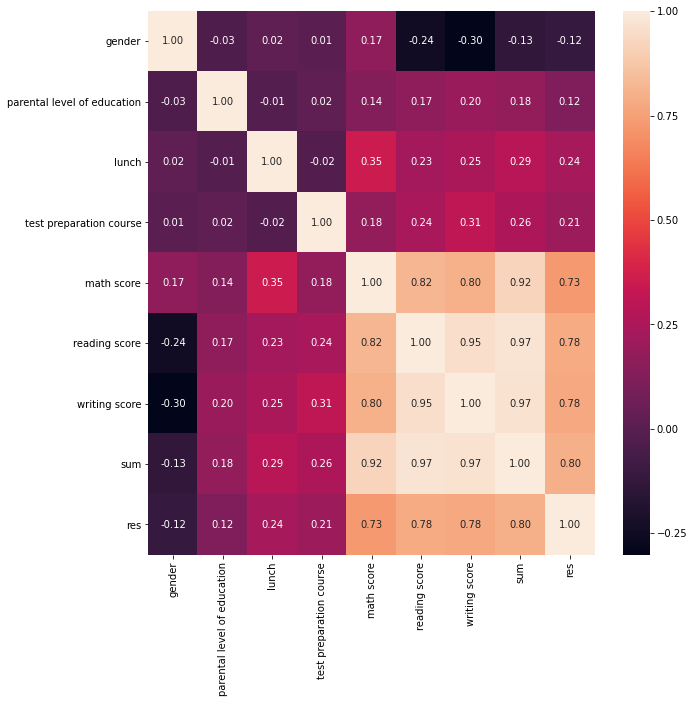

In [25]:
fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(data.corr(), annot=True, fmt='.2f')

In [26]:
data.drop(['gender'], axis=1, inplace=True)

In [27]:
class_cols = ['math score', 'reading score', 'writing score','sum']

In [28]:
X = data[class_cols]
y = data['res']
print(X, "\n")
print(y)

     math score  reading score  writing score  sum
0            72             72             74  218
1            69             90             88  247
2            90             95             93  278
3            47             57             44  148
4            76             78             75  229
5            71             83             78  232
6            88             95             92  275
7            40             43             39  122
8            64             64             67  195
9            38             60             50  148
10           58             54             52  164
11           40             52             43  135
12           65             81             73  219
13           78             72             70  220
14           50             53             58  161
15           69             75             78  222
16           88             89             86  263
17           18             32             28   78
18           46             42 

In [29]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=1)
print("X_train:", X_train.shape)
print("X_test:", X_test.shape)
print("y_train:", y_train.shape)
print("y_test:", y_test.shape)

X_train: (750, 4)
X_test: (250, 4)
y_train: (750,)
y_test: (250,)


In [30]:
class MetricLogger:
    
    def __init__(self):
        self.df = pd.DataFrame(
            {'metric': pd.Series([], dtype='str'),
            'alg': pd.Series([], dtype='str'),
            'value': pd.Series([], dtype='float')})

    def add(self, metric, alg, value):
        """
        Добавление значения
        """
        # Удаление значения если оно уже было ранее добавлено
        self.df.drop(self.df[(self.df['metric']==metric)&(self.df['alg']==alg)].index, inplace = True)
        # Добавление нового значения
        temp = [{'metric':metric, 'alg':alg, 'value':value}]
        self.df = self.df.append(temp, ignore_index=True)

    def get_data_for_metric(self, metric, ascending=True):
        """
        Формирование данных с фильтром по метрике
        """
        temp_data = self.df[self.df['metric']==metric]
        temp_data_2 = temp_data.sort_values(by='value', ascending=ascending)
        return temp_data_2['alg'].values, temp_data_2['value'].values
    
    def plot(self, str_header, metric, ascending=True, figsize=(5, 5)):
        """
        Вывод графика
        """
        array_labels, array_metric = self.get_data_for_metric(metric, ascending)
        fig, ax1 = plt.subplots(figsize=figsize)
        pos = np.arange(len(array_metric))
        rects = ax1.barh(pos, array_metric,
                         align='center',
                         height=0.5, 
                         tick_label=array_labels)
        ax1.set_title(str_header)
        for a,b in zip(pos, array_metric):
            plt.text(0.5, a-0.05, str(round(b,3)), color='white')
        plt.show()

In [31]:
metricLogger = MetricLogger()

In [32]:
def test_model(model_name, model, metricLogger):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    accuracy = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    
    metricLogger.add('precision', model_name, precision)
    metricLogger.add('recall', model_name, recall)
    metricLogger.add('f1', model_name, f1)
    metricLogger.add('accuracy', model_name, accuracy)
    
    print('*****************************************************')
    print(model)
    print(model_name)
    print("accuracy:", accuracy)
    print("f1_score:", f1)
    print("precision_score:", precision)
    print("recall:", recall)
    print('*****************************************************')

In [33]:
test_model('Random forest', RandomForestClassifier(), metricLogger)
test_model('GB', GradientBoostingClassifier(), metricLogger)

*****************************************************
RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)
Random forest
accuracy: 1.0
f1_score: 1.0
precision_score: 1.0
recall: 1.0
*****************************************************
*****************************************************
GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=

In [34]:
metrics = metricLogger.df['metric'].unique()
metrics

array(['precision', 'recall', 'f1', 'accuracy'], dtype=object)

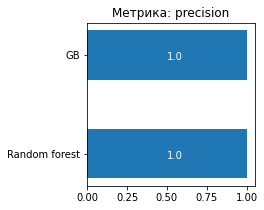

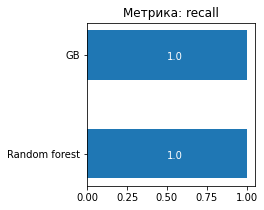

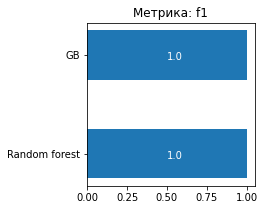

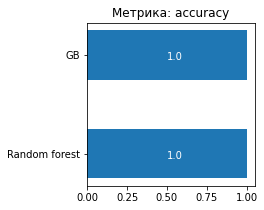

In [35]:
for metric in metrics:
    metricLogger.plot('Метрика: ' + metric, metric, figsize=(3, 3))